---


**Name:** Jann Moises Nyll B. De los Reyes

**Section:** CPE22S3

**Date:** March 28, 2024

**Submitted to:** Engr. Roman M. Richard

---

#**Hands-on Activity 11.2 Classification using Logistic Regression**

**Objective(s):**

* This activity aims to demonstrate how to apply simple linear regression analysis to solve regression problem

**Intended Learning Outcomes (ILOs):**

* Demonstrate how to solve classification problems using Logistic Regression
* Use the logistic regression model to perform classification

**Resources:**

* Jupyter Notebook
* Dataset: https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29

**Submission Requirements:**

* PDF containing initial EDA and Data Wrangling
* PDF showing demonstration of simple linear regression.
* Submit a link to the colab file through the comment section.

##**About data**

The dataset was collected at 'Hospital Universitario de Caracas' in Caracas, Venezuela. The dataset comprises demographic information, habits, and historic medical records of 858 patients. Several patients decided not to answer some of the questions because of privacy concerns (missing values).

##**Import and Install necessary libraries**

In [85]:
#This python 3 environment comes with many helpful analytics libraries installed
#For example, here's several helpful packages to Load in

import numpy as np #linear algebra
import pandas as pd #data processing,csv file i/o (e.g. pd.read_csv)
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #statistical data visualization
%matplotlib inline

In [200]:
import warnings
warnings.filterwarnings('ignore')

##**Import Dataset**

In [86]:
!pip install ucimlrepo

In [87]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cervical_cancer_risk_factors = fetch_ucirepo(id=383)

# data (as pandas dataframes)
X = cervical_cancer_risk_factors.data.features
y = cervical_cancer_risk_factors.data.targets

# metadata
print(cervical_cancer_risk_factors.metadata)

# variable information
print(cervical_cancer_risk_factors.variables)


{'uci_id': 383, 'name': 'Cervical Cancer (Risk Factors)', 'repository_url': 'https://archive.ics.uci.edu/dataset/383/cervical+cancer+risk+factors', 'data_url': 'https://archive.ics.uci.edu/static/public/383/data.csv', 'abstract': 'This dataset focuses on the prediction of indicators/diagnosis of cervical cancer. The features cover demographic information, habits, and historic medical records.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 858, 'num_features': 36, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Other'], 'target_col': None, 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2017, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5Z310', 'creators': ['Kelwin Fernandes', 'Jaime Cardoso', 'Jessica Fernandes'], 'intro_paper': {'title': 'Transfer Learning with Partial Observability Applied to Cervical Cancer Screening', 'autho

##**Access each dataframe columns**

In [88]:
X.columns #feature variables

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [89]:
y.columns

AttributeError: 'NoneType' object has no attribute 'columns'

In [90]:
df = pd.concat([X,y], axis = 1)
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


As we can see, we dont have any variables in our y columns. we can then proceed in exploring the dataset first before we make some changes.

##**Data Wrangling and Engineering Data Analysis**

Now, we will explore the data to gain insight about the data

In [91]:
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [92]:
#view dimension of the dataset

df.shape

(858, 36)

We can see that we have 858 instances and  36  variables in the dataset.

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [94]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,858.0,26.820513,8.497948,13.0,20.0,25.0,32.0,84.0
Number of sexual partners,832.0,2.527644,1.667760,1.0,2.0,2.0,3.0,28.0
First sexual intercourse,851.0,16.995300,2.803355,10.0,15.0,17.0,18.0,32.0
Num of pregnancies,802.0,2.275561,1.447414,0.0,1.0,2.0,3.0,11.0
Smokes,845.0,0.145562,0.352876,0.0,0.0,0.0,0.0,1.0
Smokes (years),845.0,1.219721,4.089017,0.0,0.0,0.0,0.0,37.0
Smokes (packs/year),845.0,0.453144,2.226610,0.0,0.0,0.0,0.0,37.0
Hormonal Contraceptives,750.0,0.641333,0.479929,0.0,0.0,1.0,1.0,1.0
Hormonal Contraceptives (years),750.0,2.256419,3.764254,0.0,0.0,0.5,3.0,30.0
IUD,741.0,0.112011,0.315593,0.0,0.0,0.0,0.0,1.0


In [95]:
col_names = df.columns

col_names

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

##**Renaming Columns**

As we can see the following columns are not named properly.



In [96]:
# replace spaces by underscore and convert to lowercase
df.columns = [col.replace(' ','_').lower() for col in df.columns]

df.columns

Index(['age', 'number_of_sexual_partners', 'first_sexual_intercourse',
       'num_of_pregnancies', 'smokes', 'smokes_(years)', 'smokes_(packs/year)',
       'hormonal_contraceptives', 'hormonal_contraceptives_(years)', 'iud',
       'iud_(years)', 'stds', 'stds_(number)', 'stds:condylomatosis',
       'stds:cervical_condylomatosis', 'stds:vaginal_condylomatosis',
       'stds:vulvo-perineal_condylomatosis', 'stds:syphilis',
       'stds:pelvic_inflammatory_disease', 'stds:genital_herpes',
       'stds:molluscum_contagiosum', 'stds:aids', 'stds:hiv',
       'stds:hepatitis_b', 'stds:hpv', 'stds:_number_of_diagnosis',
       'stds:_time_since_first_diagnosis', 'stds:_time_since_last_diagnosis',
       'dx:cancer', 'dx:cin', 'dx:hpv', 'dx', 'hinselmann', 'schiller',
       'citology', 'biopsy'],
      dtype='object')

##**Types of Variables in our dataset**

In this section, I segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type float64.

first of all, we will find categorical variables

In [97]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype =='O']

print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are:', categorical)

There are 0 categorical variables

The categorical variables are: []


####**Summary of categorical variables**

* The dataset contains no categorical variables

##**Explore Numerical Variables**

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   age                                 858 non-null    int64  
 1   number_of_sexual_partners           832 non-null    float64
 2   first_sexual_intercourse            851 non-null    float64
 3   num_of_pregnancies                  802 non-null    float64
 4   smokes                              845 non-null    float64
 5   smokes_(years)                      845 non-null    float64
 6   smokes_(packs/year)                 845 non-null    float64
 7   hormonal_contraceptives             750 non-null    float64
 8   hormonal_contraceptives_(years)     750 non-null    float64
 9   iud                                 741 non-null    float64
 10  iud_(years)                         741 non-null    float64
 11  stds                                753 non-n

In [99]:
#find numerical variables

numerical = [var for var in df.columns if df[var].dtypes != 'O']

print( 'There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are: ',numerical)

There are 36 numerical variables

The numerical variables are:  ['age', 'number_of_sexual_partners', 'first_sexual_intercourse', 'num_of_pregnancies', 'smokes', 'smokes_(years)', 'smokes_(packs/year)', 'hormonal_contraceptives', 'hormonal_contraceptives_(years)', 'iud', 'iud_(years)', 'stds', 'stds_(number)', 'stds:condylomatosis', 'stds:cervical_condylomatosis', 'stds:vaginal_condylomatosis', 'stds:vulvo-perineal_condylomatosis', 'stds:syphilis', 'stds:pelvic_inflammatory_disease', 'stds:genital_herpes', 'stds:molluscum_contagiosum', 'stds:aids', 'stds:hiv', 'stds:hepatitis_b', 'stds:hpv', 'stds:_number_of_diagnosis', 'stds:_time_since_first_diagnosis', 'stds:_time_since_last_diagnosis', 'dx:cancer', 'dx:cin', 'dx:hpv', 'dx', 'hinselmann', 'schiller', 'citology', 'biopsy']


In [100]:
#view the numerical values

df[numerical].head()

,age,number_of_sexual_partners,first_sexual_intercourse,num_of_pregnancies,smokes,smokes_(years),smokes_(packs/year),hormonal_contraceptives,hormonal_contraceptives_(years),iud,...,stds:_time_since_first_diagnosis,stds:_time_since_last_diagnosis,dx:cancer,dx:cin,dx:hpv,dx,hinselmann,schiller,citology,biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


####**Summary of numerical variables**

* There are 36 numerical variables.



###**Explore problems within numerical variables**

Now, We will explore the numerical variables

##**Missing values in numerical variables**

In [101]:
#check missing values in numerical variables

df.isnull().sum()

age                                     0
number_of_sexual_partners              26
first_sexual_intercourse                7
num_of_pregnancies                     56
smokes                                 13
smokes_(years)                         13
smokes_(packs/year)                    13
hormonal_contraceptives               108
hormonal_contraceptives_(years)       108
iud                                   117
iud_(years)                           117
stds                                  105
stds_(number)                         105
stds:condylomatosis                   105
stds:cervical_condylomatosis          105
stds:vaginal_condylomatosis           105
stds:vulvo-perineal_condylomatosis    105
stds:syphilis                         105
stds:pelvic_inflammatory_disease      105
stds:genital_herpes                   105
stds:molluscum_contagiosum            105
stds:aids                             105
stds:hiv                              105
stds:hepatitis_b                  

We could drop the `stds:_time_since_first_diagnosis` and `stds:_time_since_last_diagnosis` in our data frame

In [102]:
df = df.drop(["stds:_time_since_first_diagnosis", "stds:_time_since_last_diagnosis"], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   age                                 858 non-null    int64  
 1   number_of_sexual_partners           832 non-null    float64
 2   first_sexual_intercourse            851 non-null    float64
 3   num_of_pregnancies                  802 non-null    float64
 4   smokes                              845 non-null    float64
 5   smokes_(years)                      845 non-null    float64
 6   smokes_(packs/year)                 845 non-null    float64
 7   hormonal_contraceptives             750 non-null    float64
 8   hormonal_contraceptives_(years)     750 non-null    float64
 9   iud                                 741 non-null    float64
 10  iud_(years)                         741 non-null    float64
 11  stds                                753 non-n

In [103]:
# we create a function to make show the unique value of each column
def print_unique_values_df(df: pd.DataFrame):
    for col in list(df):
        print("Unique Values for "'{}'":{}".format(str(col), df[col].unique()))
        print("-" * 150)

In [104]:
print_unique_values_df(df)

Unique Values for age:[18 15 34 52 46 42 51 26 45 44 27 43 40 41 39 37 38 36 35 33 31 32 30 23
 28 29 20 25 21 24 22 48 19 17 16 14 59 79 84 47 13 70 50 49]
------------------------------------------------------------------------------------------------------------------------------------------------------
Unique Values for number_of_sexual_partners:[ 4.  1.  5.  3.  2.  6. nan  7. 15.  8. 10. 28.  9.]
------------------------------------------------------------------------------------------------------------------------------------------------------
Unique Values for first_sexual_intercourse:[15. 14. nan 16. 21. 23. 17. 26. 20. 25. 18. 27. 19. 24. 32. 13. 29. 11.
 12. 22. 28. 10.]
------------------------------------------------------------------------------------------------------------------------------------------------------
Unique Values for num_of_pregnancies:[ 1.  4.  2.  6.  3.  5. nan  8.  7.  0. 11. 10.]
-----------------------------------------------------------------------

In [105]:
miss_col = df.columns[df.isnull().any()]
print(miss_col)

Index(['number_of_sexual_partners', 'first_sexual_intercourse',
       'num_of_pregnancies', 'smokes', 'smokes_(years)', 'smokes_(packs/year)',
       'hormonal_contraceptives', 'hormonal_contraceptives_(years)', 'iud',
       'iud_(years)', 'stds', 'stds_(number)', 'stds:condylomatosis',
       'stds:cervical_condylomatosis', 'stds:vaginal_condylomatosis',
       'stds:vulvo-perineal_condylomatosis', 'stds:syphilis',
       'stds:pelvic_inflammatory_disease', 'stds:genital_herpes',
       'stds:molluscum_contagiosum', 'stds:aids', 'stds:hiv',
       'stds:hepatitis_b', 'stds:hpv'],
      dtype='object')


##**Filling missing values**

In [106]:
#fill the missing values with 0
for i in df.columns:
    df[i].replace('?',np.nan,inplace=True )
    df[i].fillna(value=0,inplace=True)



In [107]:
#fill the values with median
for i in df.columns:
    df[i].replace(0,df[i].median(),inplace=True)

In [109]:
df.head()

,age,number_of_sexual_partners,first_sexual_intercourse,num_of_pregnancies,smokes,smokes_(years),smokes_(packs/year),hormonal_contraceptives,hormonal_contraceptives_(years),iud,...,stds:hpv,stds:_number_of_diagnosis,dx:cancer,dx:cin,dx:hpv,dx,hinselmann,schiller,citology,biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,1.0,0.25,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,1.0,0.25,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,1.0,0.25,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [108]:
df.isnull().sum()

age                                   0
number_of_sexual_partners             0
first_sexual_intercourse              0
num_of_pregnancies                    0
smokes                                0
smokes_(years)                        0
smokes_(packs/year)                   0
hormonal_contraceptives               0
hormonal_contraceptives_(years)       0
iud                                   0
iud_(years)                           0
stds                                  0
stds_(number)                         0
stds:condylomatosis                   0
stds:cervical_condylomatosis          0
stds:vaginal_condylomatosis           0
stds:vulvo-perineal_condylomatosis    0
stds:syphilis                         0
stds:pelvic_inflammatory_disease      0
stds:genital_herpes                   0
stds:molluscum_contagiosum            0
stds:aids                             0
stds:hiv                              0
stds:hepatitis_b                      0
stds:hpv                              0


##**Data Analysis**


Let us visualize and try to understand the impact of our features on dependent variable.

<Axes: xlabel='age', ylabel='Count'>

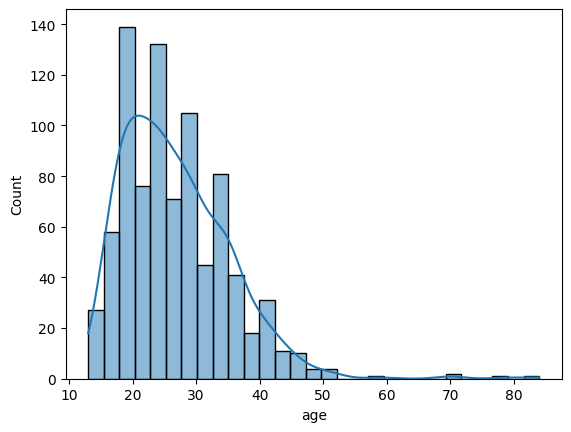

In [110]:
sns.histplot(data=df, x="age", kde=True)

From this graph we could see that people with age group 20-40 has affected mostly with cervical cancer.

<Axes: xlabel='number_of_sexual_partners', ylabel='Count'>

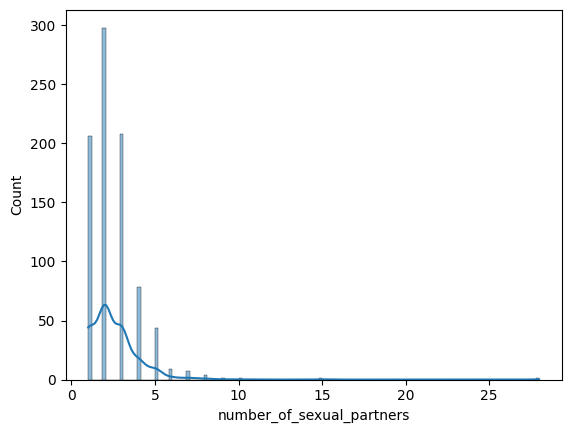

In [111]:
sns.histplot(data=df, x="number_of_sexual_partners", kde=True)

<Axes: xlabel='num_of_pregnancies', ylabel='Count'>

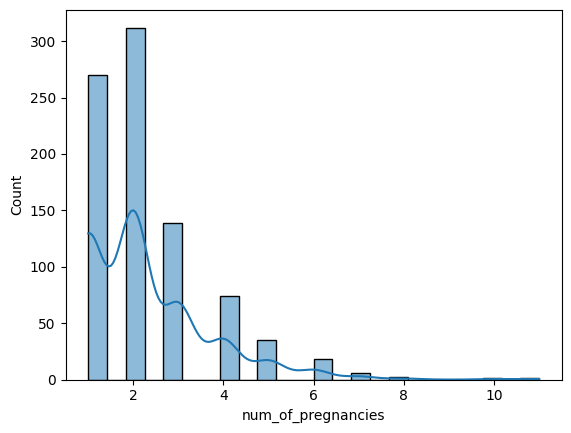

In [112]:
sns.histplot(data=df, x="num_of_pregnancies", kde=True)



<Axes: xlabel='age', ylabel='number_of_sexual_partners'>

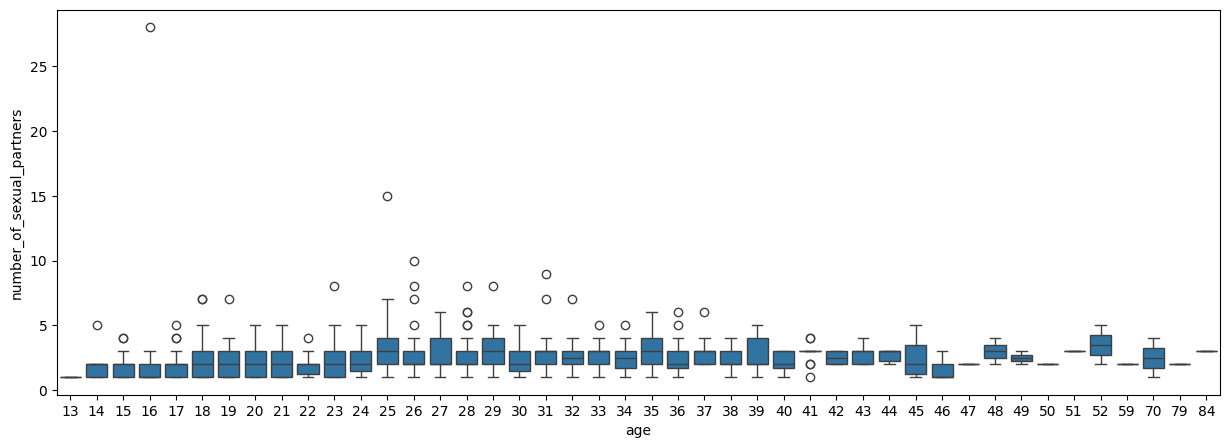

In [114]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="age", y="number_of_sexual_partners")


<Axes: xlabel='age', ylabel='biopsy'>

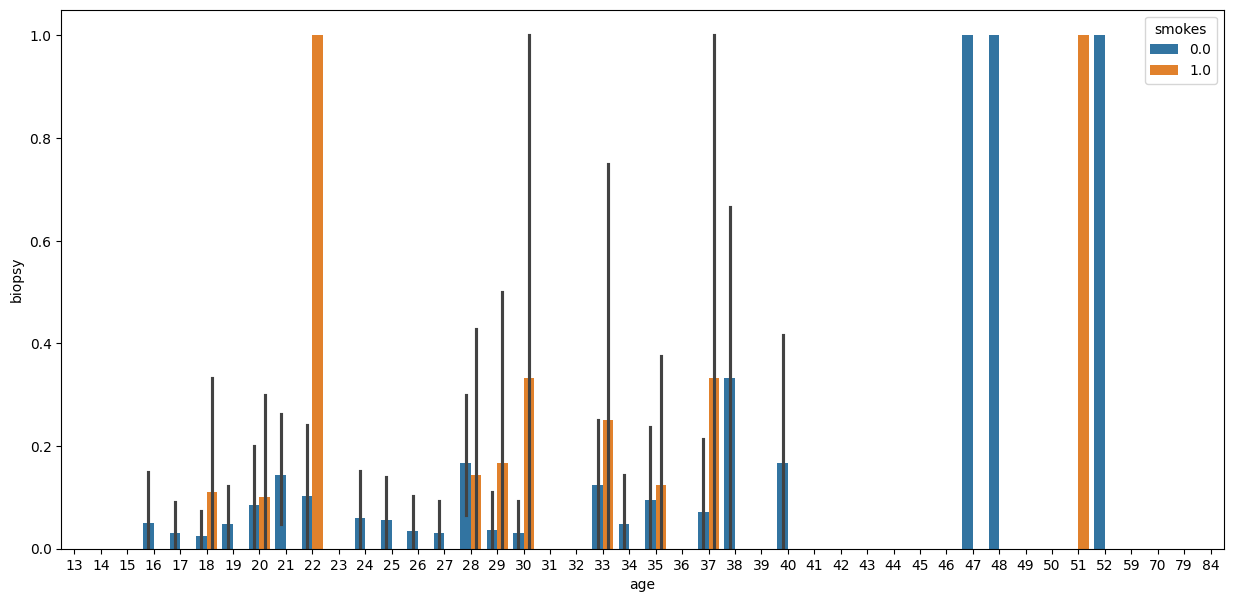

In [115]:
plt.figure(figsize=(15, 7))
sns.barplot(data=df, x="age", y="biopsy", hue="smokes")

<Axes: xlabel='age', ylabel='num_of_pregnancies'>

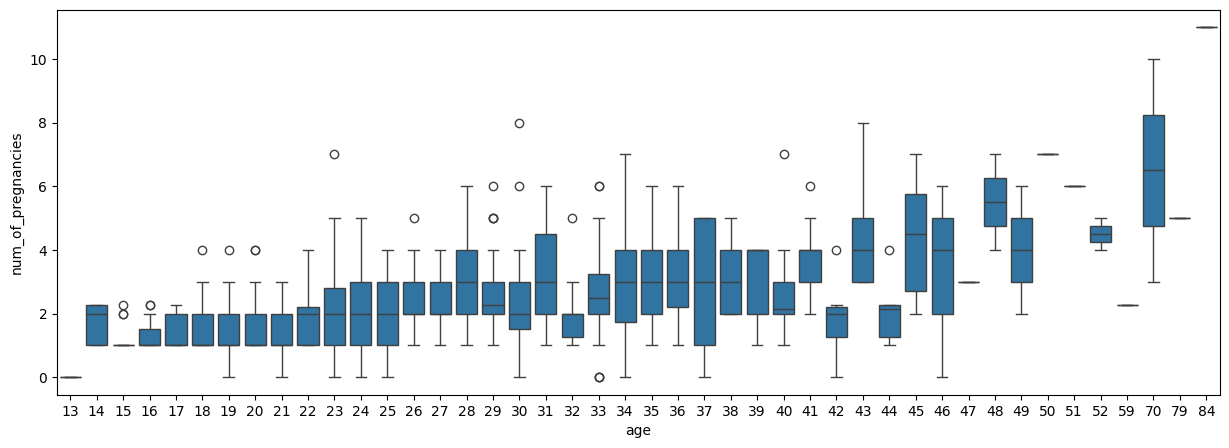

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="age", y="num_of_pregnancies")

Let us create a dataframe `target` which contains all the four tests

In [ ]:
target = pd.DataFrame(df[['hinselmann','schiller','citology','biopsy']])

target.head(10)

,hinselmann,schiller,citology,biopsy
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
6,1,1,0,1
7,0,0,0,0
8,0,0,0,0
9,0,0,0,0


Let us find the count of cancer affected person with respect to four kind of tests.

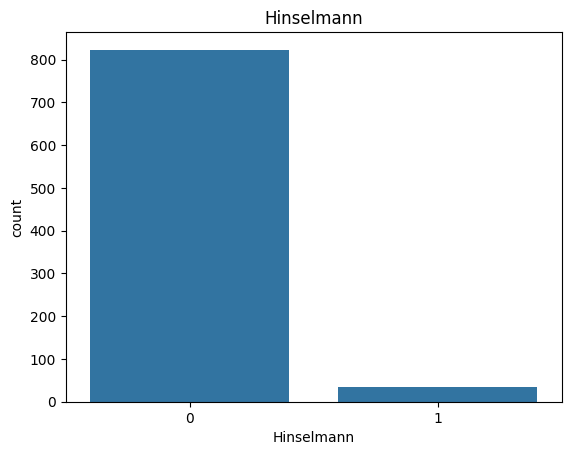

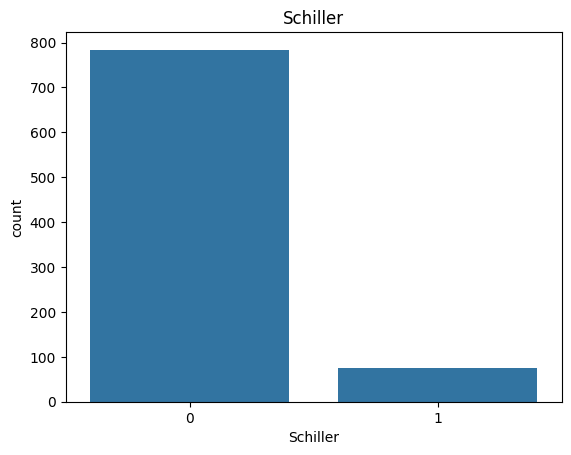

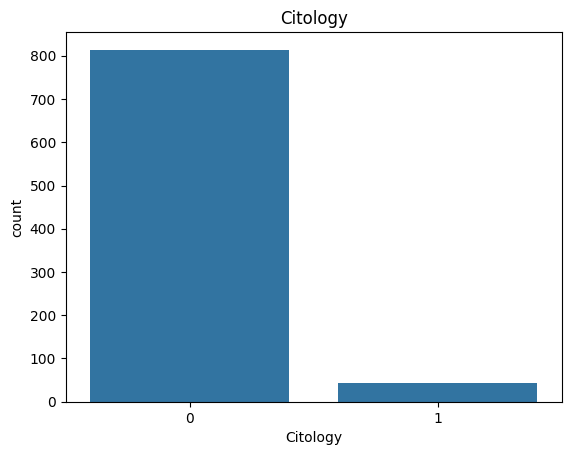

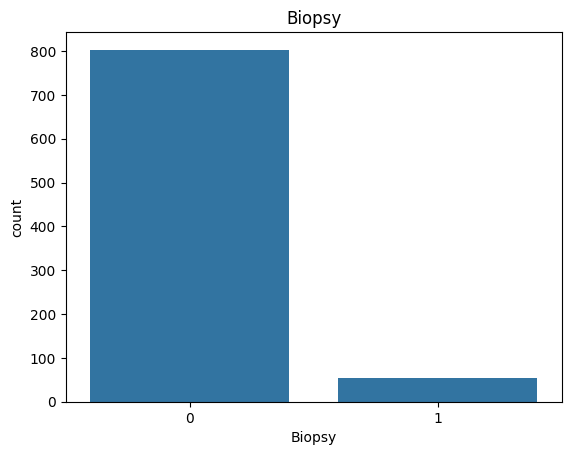

In [ ]:
for i in target.columns:
    sns.countplot(x=target[i])
    plt.xlabel(i.capitalize())
    plt.title(i.capitalize())
    plt.show()

Let us find the age count of cancer affected person with respect to four kind of tests.

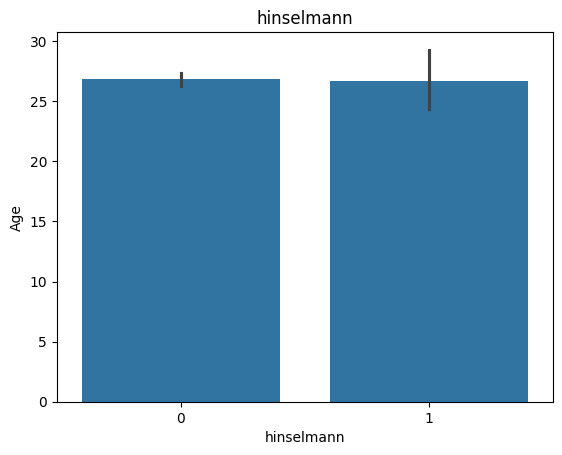

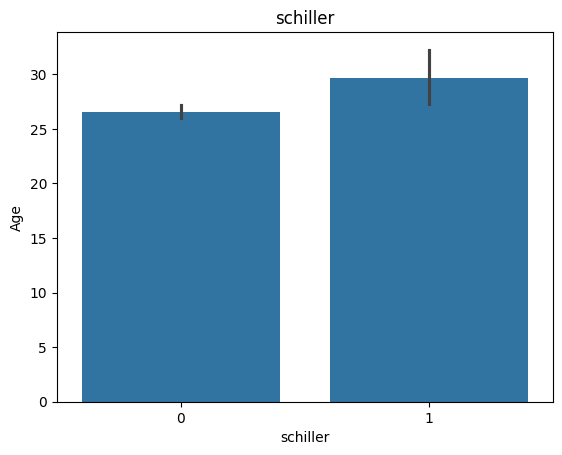

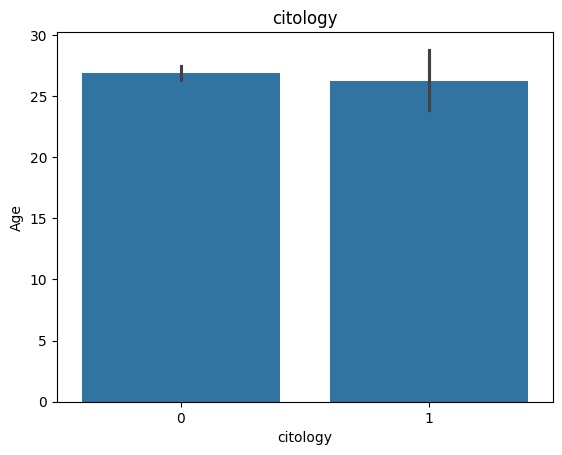

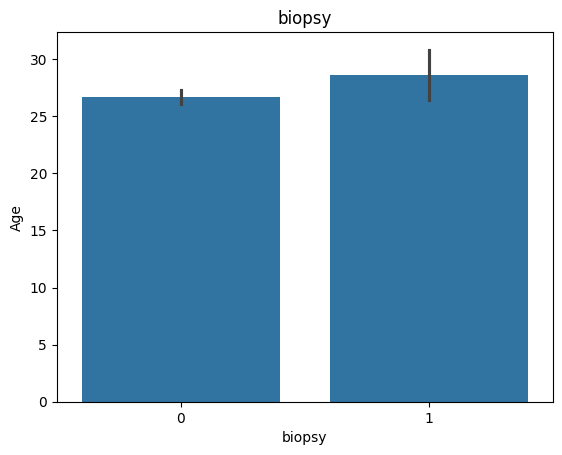

In [116]:
for i in target.columns:
    sns.barplot(x=s[i],y=df['age'])
    plt.xlabel(i)
    plt.ylabel("Age")
    plt.title(i)
    plt.show()

Now let us visualize the correlation of the df dataframe which contains the target values.

<Axes: >

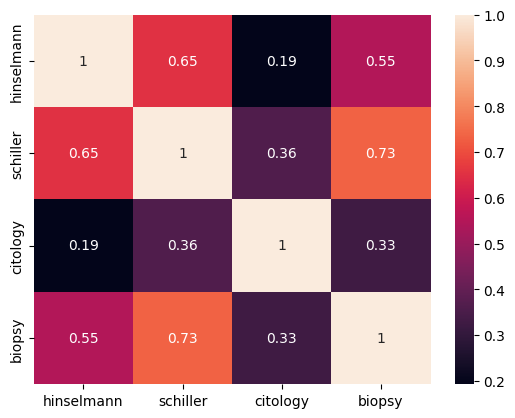

In [117]:
sns.heatmap(target.corr(),annot=True)

<Axes: >

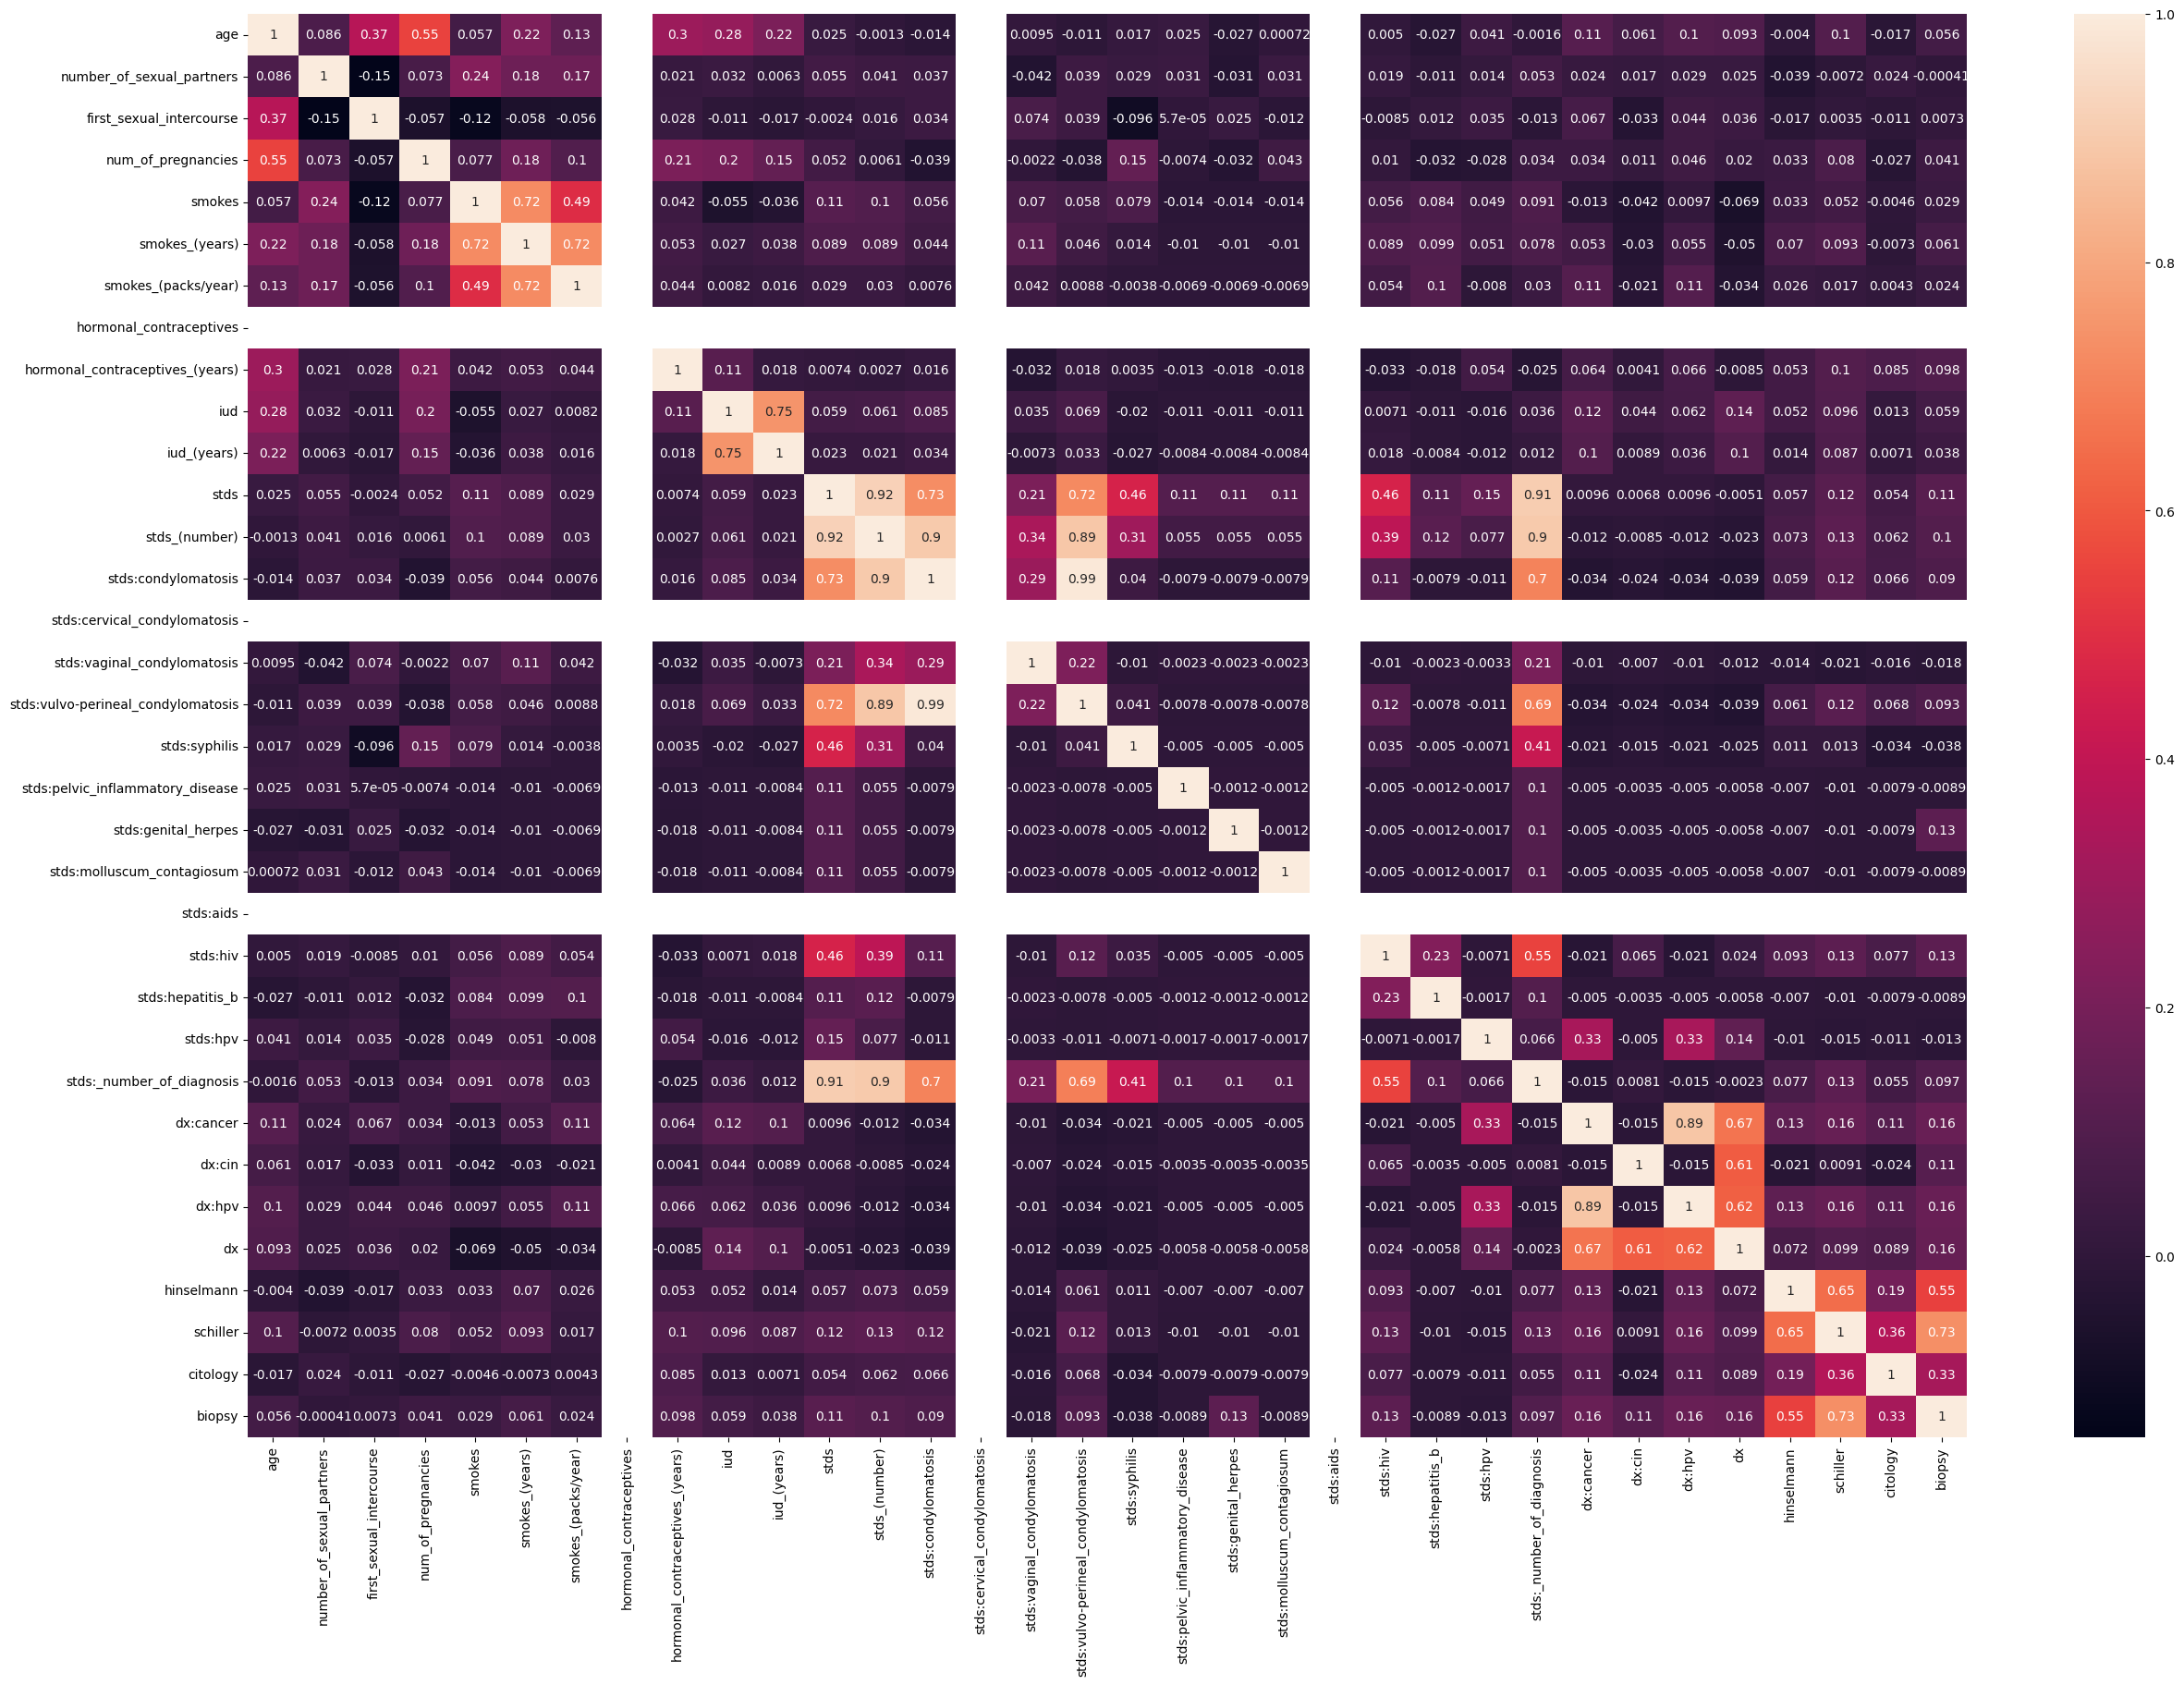

##**Outliers in dataframe**



In [121]:
df.corr()

,age,number_of_sexual_partners,first_sexual_intercourse,num_of_pregnancies,smokes,smokes_(years),smokes_(packs/year),hormonal_contraceptives,hormonal_contraceptives_(years),iud,...,stds:hpv,stds:_number_of_diagnosis,dx:cancer,dx:cin,dx:hpv,dx,hinselmann,schiller,citology,biopsy
age,1.000000,0.085971,0.369175,0.548765,0.057204,0.218261,0.131861,NaN,0.299756,0.279429,...,0.040861,-0.001606,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862,0.055956
number_of_sexual_partners,0.085971,1.000000,-0.145847,0.072967,0.236858,0.175729,0.174968,NaN,0.021486,0.032460,...,0.014360,0.053056,0.023699,0.016669,0.028646,0.024597,-0.039098,-0.007230,0.024067,-0.000408
first_sexual_intercourse,0.369175,-0.145847,1.000000,-0.056526,-0.123280,-0.058207,-0.056232,NaN,0.028035,-0.010758,...,0.034728,-0.013331,0.067281,-0.032628,0.043964,0.035748,-0.016549,0.003489,-0.010974,0.007259
num_of_pregnancies,0.548765,0.072967,-0.056526,1.000000,0.077271,0.178909,0.100083,NaN,0.213995,0.200717,...,-0.028132,0.033542,0.033896,0.011276,0.045805,0.020303,0.033131,0.079582,-0.026983,0.041050
smokes,0.057204,0.236858,-0.123280,0.077271,1.000000,0.723572,0.493843,NaN,0.041819,-0.055115,...,0.049193,0.090725,-0.013470,-0.042119,0.009737,-0.069396,0.033333,0.052028,-0.004639,0.028724
smokes_(years),0.218261,0.175729,-0.058207,0.178909,0.723572,1.000000,0.724320,NaN,0.053314,0.027492,...,0.051201,0.078303,0.052859,-0.030476,0.055398,-0.050213,0.070352,0.093479,-0.007275,0.061204
smokes_(packs/year),0.131861,0.174968,-0.056232,0.100083,0.493843,0.724320,1.000000,NaN,0.044009,0.008226,...,-0.008015,0.029912,0.107229,-0.020800,0.109118,-0.034270,0.026086,0.017200,0.004250,0.024487
hormonal_contraceptives,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hormonal_contraceptives_(years),0.299756,0.021486,0.028035,0.213995,0.041819,0.053314,0.044009,NaN,1.000000,0.114451,...,0.053537,-0.025258,0.064398,0.004074,0.065938,-0.008460,0.052923,0.101309,0.085330,0.097822
iud,0.279429,0.032460,-0.010758,0.200717,-0.055115,0.027492,0.008226,NaN,0.114451,1.000000,...,-0.015819,0.035791,0.117166,0.043708,0.062142,0.135778,0.052108,0.096089,0.013292,0.059231


<Axes: >

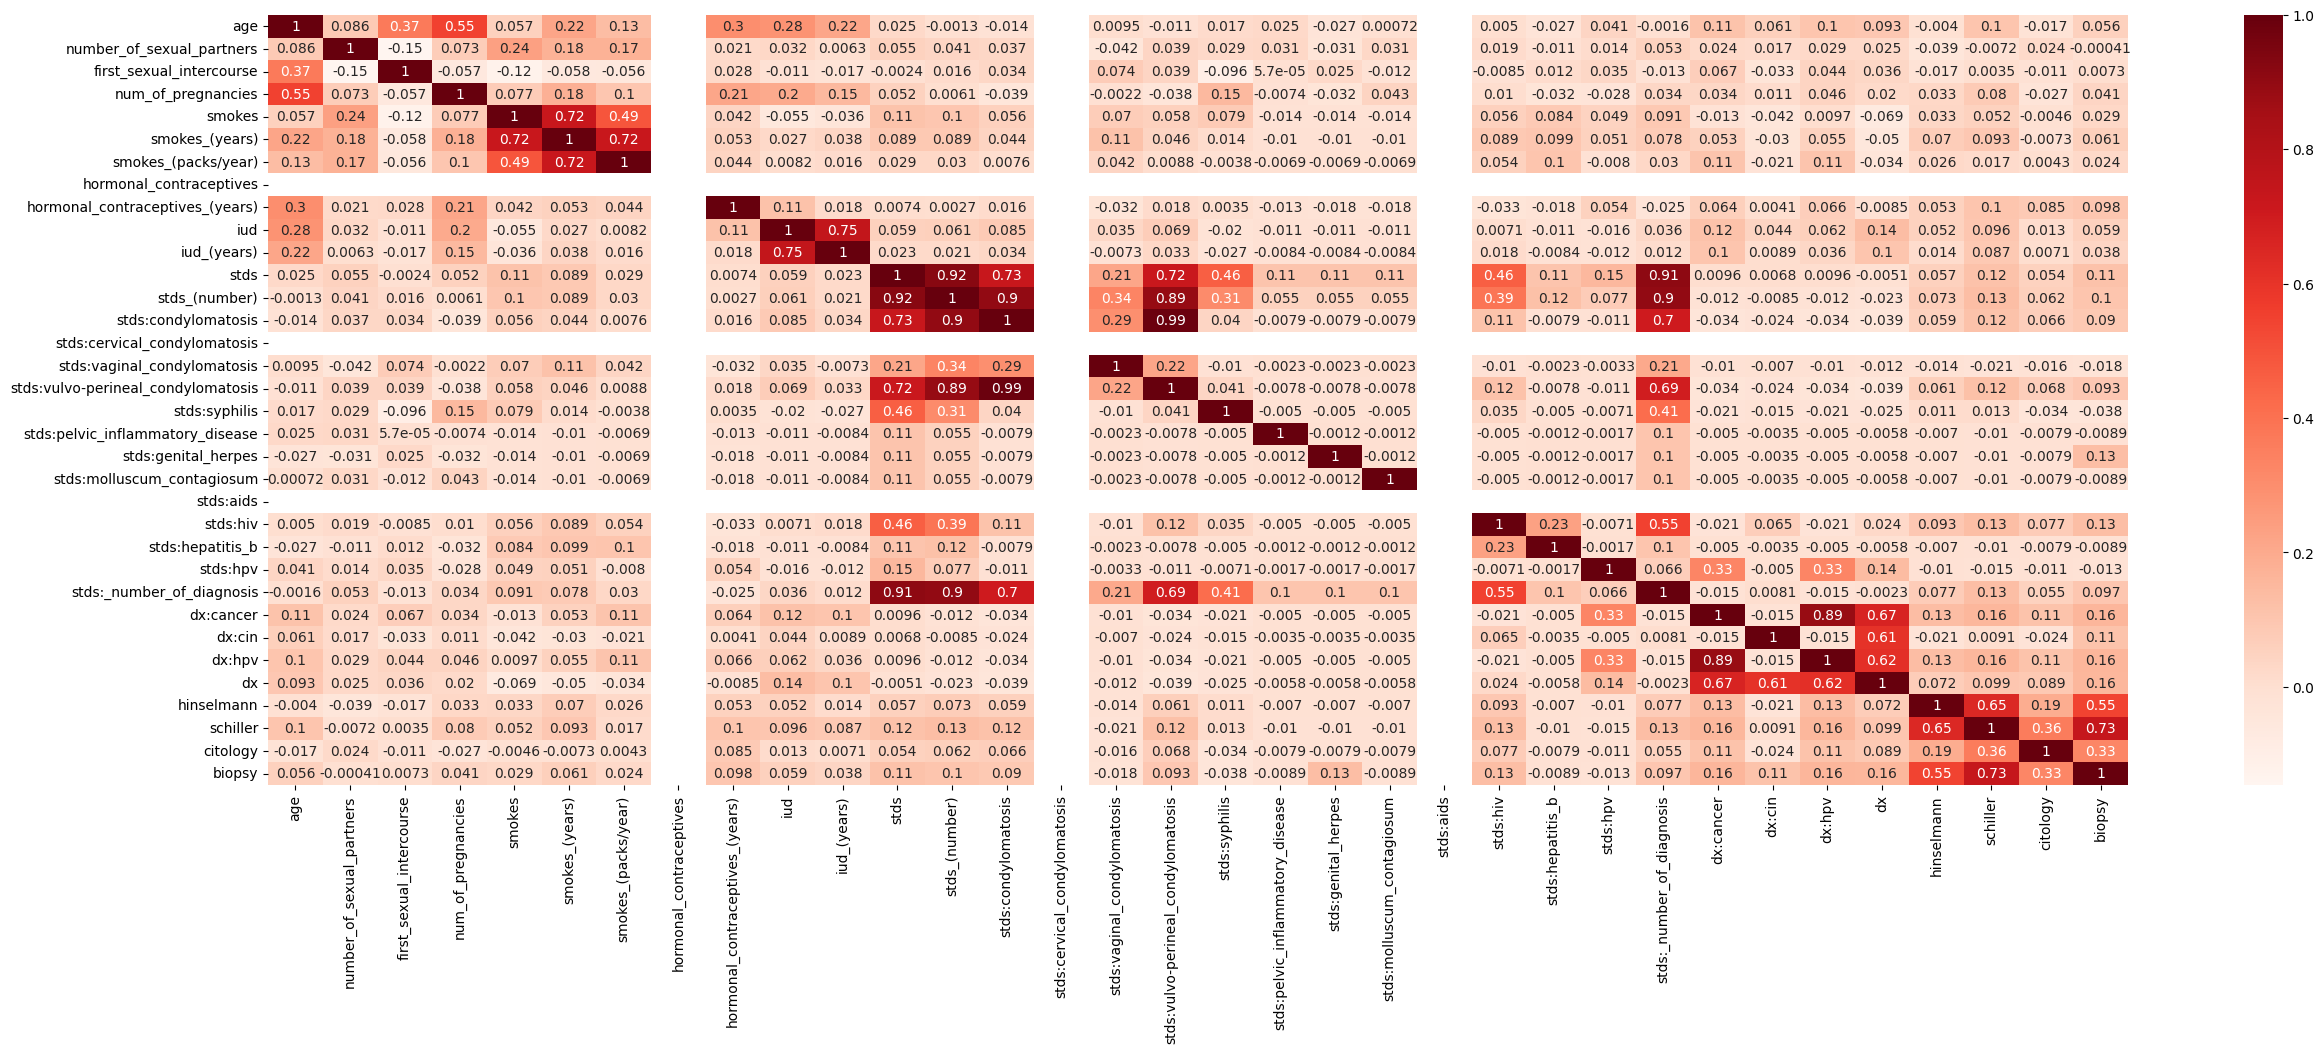

In [122]:
plt.figure(figsize = (30,10))
sns.heatmap(df.corr(),annot = True, cmap ='Reds')

In [124]:
# view summary statistics in numerical variables

print(round(df.describe()),2)

         age  number_of_sexual_partners  first_sexual_intercourse  \
count  858.0                      858.0                     858.0   
mean    27.0                        3.0                      17.0   
std      8.0                        2.0                       3.0   
min     13.0                        1.0                      10.0   
25%     20.0                        2.0                      15.0   
50%     25.0                        2.0                      17.0   
75%     32.0                        3.0                      18.0   
max     84.0                       28.0                      32.0   

       num_of_pregnancies  smokes  smokes_(years)  smokes_(packs/year)  \
count               858.0   858.0           858.0                858.0   
mean                  2.0     0.0             1.0                  0.0   
std                   1.0     0.0             4.0                  2.0   
min                   1.0     0.0             0.0                  0.0   
25%     

We could see that our target value has four columns. In order to make it to one we are going add the outcomes of all the four tests and store it in a seperate column called 'count'.

In [128]:
target['count']=target['hinselmann']+target['schiller']+target['citology']+target['biopsy']

In [133]:
target['count'].value_counts()

count
0    756
1     41
3     33
2     22
4      6
Name: count, dtype: int64

In [131]:
target

,hinselmann,schiller,citology,biopsy,count
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
853,0,0,0,0,0
854,0,0,0,0,0
855,0,0,1,0,1
856,0,0,0,0,0


For  better predictions we are going replace 1,2,3,4 with 1 which means the patient has cancer and 0 means the patient doesn't have cervix cancer.


In [135]:
target['result']=np.where(target['count']>0,1,target['count'])

In [137]:
target['result'].value_counts()

result
0    756
1    102
Name: count, dtype: int64

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   age                                 858 non-null    int64  
 1   number_of_sexual_partners           858 non-null    float64
 2   first_sexual_intercourse            858 non-null    float64
 3   num_of_pregnancies                  858 non-null    float64
 4   smokes                              858 non-null    float64
 5   smokes_(years)                      858 non-null    float64
 6   smokes_(packs/year)                 858 non-null    float64
 7   hormonal_contraceptives             858 non-null    float64
 8   hormonal_contraceptives_(years)     858 non-null    float64
 9   iud                                 858 non-null    float64
 10  iud_(years)                         858 non-null    float64
 11  stds                                858 non-n

###**Declare feature vector and target variable**

In [143]:
X=df.drop(columns=['hinselmann','schiller','citology','biopsy'],axis=1)
y=target['result']

##**Split data into separate training and test set**

In [144]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [145]:
#check the shape of  X_train and X_test

X_train.shape, X_test.shape

((686, 30), (172, 30))

In [147]:
#check data types in X_train

X_train.dtypes

age                                     int64
number_of_sexual_partners             float64
first_sexual_intercourse              float64
num_of_pregnancies                    float64
smokes                                float64
smokes_(years)                        float64
smokes_(packs/year)                   float64
hormonal_contraceptives               float64
hormonal_contraceptives_(years)       float64
iud                                   float64
iud_(years)                           float64
stds                                  float64
stds_(number)                         float64
stds:condylomatosis                   float64
stds:cervical_condylomatosis          float64
stds:vaginal_condylomatosis           float64
stds:vulvo-perineal_condylomatosis    float64
stds:syphilis                         float64
stds:pelvic_inflammatory_disease      float64
stds:genital_herpes                   float64
stds:molluscum_contagiosum            float64
stds:aids                         

##**Feature Scaling**

In [146]:
X_train.describe()

,age,number_of_sexual_partners,first_sexual_intercourse,num_of_pregnancies,smokes,smokes_(years),smokes_(packs/year),hormonal_contraceptives,hormonal_contraceptives_(years),iud,...,stds:molluscum_contagiosum,stds:aids,stds:hiv,stds:hepatitis_b,stds:hpv,stds:_number_of_diagnosis,dx:cancer,dx:cin,dx:hpv,dx
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.0,686.000000,686.000000,...,686.000000,686.0,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,26.946064,2.559767,16.931487,2.304665,0.144315,1.191832,0.482925,1.0,2.146636,0.094752,...,0.001458,0.0,0.021866,0.001458,0.002915,0.091837,0.024781,0.011662,0.024781,0.032070
std,8.391776,1.696303,2.806088,1.346162,0.351665,3.960110,2.372255,0.0,3.545263,0.293086,...,0.038180,0.0,0.146352,0.038180,0.053955,0.308550,0.155572,0.107437,0.155572,0.176315
min,14.000000,1.000000,10.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.080000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.250000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.0,0.250000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.0,3.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,79.000000,28.000000,32.000000,10.000000,1.000000,37.000000,37.000000,1.0,22.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [148]:
cols = X_train.columns

In [149]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train =scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [150]:
X_train = pd.DataFrame(X_train, columns = [cols])

In [151]:
X_test = pd.DataFrame(X_test, columns = [cols])

In [152]:
X_train.describe()

,age,number_of_sexual_partners,first_sexual_intercourse,num_of_pregnancies,smokes,smokes_(years),smokes_(packs/year),hormonal_contraceptives,hormonal_contraceptives_(years),iud,...,stds:molluscum_contagiosum,stds:aids,stds:hiv,stds:hepatitis_b,stds:hpv,stds:_number_of_diagnosis,dx:cancer,dx:cin,dx:hpv,dx
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.0,686.000000,686.000000,...,686.000000,686.0,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,0.199170,0.057769,0.315068,0.144963,0.144315,0.032212,0.013052,0.0,0.094281,0.094752,...,0.001458,0.0,0.021866,0.001458,0.002915,0.030612,0.024781,0.011662,0.024781,0.032070
std,0.129104,0.062826,0.127549,0.149574,0.351665,0.107030,0.064115,0.0,0.161736,0.293086,...,0.038180,0.0,0.146352,0.038180,0.053955,0.102850,0.155572,0.107437,0.155572,0.176315
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.092308,0.037037,0.227273,0.000000,0.000000,0.000000,0.000000,0.0,0.007755,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.184615,0.037037,0.318182,0.111111,0.000000,0.000000,0.000000,0.0,0.007755,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.276923,0.074074,0.363636,0.222222,0.000000,0.000000,0.000000,0.0,0.133212,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Model Traning

In [153]:
#train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

#instatiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)

#fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

##**Predicting result**

In [154]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

###**predict_proba method**
predict_proba method gives the probabilities for the target variable(0 and 1) in this case, in array form.

`0 is for probability for no cancer` and `1 is for probability for cancer`.

In [155]:
# predict proba: predicts possibilities for the target variable
logreg.predict_proba(X_test)[:,0]

array([0.91332527, 0.82285053, 0.86764707, 0.74526936, 0.93142289,
       0.92027532, 0.90635415, 0.89104937, 0.8975672 , 0.9098986 ,
       0.92306916, 0.71274566, 0.90491095, 0.91634206, 0.91519639,
       0.91603395, 0.88025761, 0.90063575, 0.911889  , 0.91524826,
       0.91270884, 0.92822079, 0.87934366, 0.89828651, 0.85919734,
       0.75599339, 0.91516378, 0.92503815, 0.58189227, 0.92523765,
       0.90559866, 0.89507894, 0.86112856, 0.90438737, 0.84888326,
       0.84369637, 0.85136302, 0.92493669, 0.89536237, 0.9202048 ,
       0.92887496, 0.9050995 , 0.92769858, 0.91253378, 0.89459975,
       0.82644359, 0.8826911 , 0.91303584, 0.88717809, 0.92446541,
       0.89898631, 0.93799718, 0.91618851, 0.85550105, 0.91018279,
       0.91623395, 0.88315552, 0.87540852, 0.83736056, 0.90396857,
       0.90081768, 0.63788273, 0.76784532, 0.84297946, 0.91904656,
       0.81398401, 0.90850451, 0.90306875, 0.89195512, 0.91302053,
       0.91414299, 0.91670929, 0.90634622, 0.6865183 , 0.76692

In [156]:
#probability of getting output as 1 -  rain

logreg.predict_proba(X_test)[:,1]

array([0.08667473, 0.17714947, 0.13235293, 0.25473064, 0.06857711,
       0.07972468, 0.09364585, 0.10895063, 0.1024328 , 0.0901014 ,
       0.07693084, 0.28725434, 0.09508905, 0.08365794, 0.08480361,
       0.08396605, 0.11974239, 0.09936425, 0.088111  , 0.08475174,
       0.08729116, 0.07177921, 0.12065634, 0.10171349, 0.14080266,
       0.24400661, 0.08483622, 0.07496185, 0.41810773, 0.07476235,
       0.09440134, 0.10492106, 0.13887144, 0.09561263, 0.15111674,
       0.15630363, 0.14863698, 0.07506331, 0.10463763, 0.0797952 ,
       0.07112504, 0.0949005 , 0.07230142, 0.08746622, 0.10540025,
       0.17355641, 0.1173089 , 0.08696416, 0.11282191, 0.07553459,
       0.10101369, 0.06200282, 0.08381149, 0.14449895, 0.08981721,
       0.08376605, 0.11684448, 0.12459148, 0.16263944, 0.09603143,
       0.09918232, 0.36211727, 0.23215468, 0.15702054, 0.08095344,
       0.18601599, 0.09149549, 0.09693125, 0.10804488, 0.08697947,
       0.08585701, 0.08329071, 0.09365378, 0.3134817 , 0.23307

###**Check accuracy score**

In [157]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test,y_pred_test)))

Model accuracy score: 0.8953


Here, **y_test** are the true class labels and **y_pred_test** are the predicted class labels in the test-set.

####**Compare the train-set and test-set accuracy**

Now, we will compare the train-set and test-set accuracy to check for overfitting.

In [158]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [159]:
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8834


##**Check for overfitting and underfittng**

In [160]:
# print the scores on  training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train,y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8834
Test set score: 0.8953


The training-set accuracy score is 0.8834 while the test-set accuracy to be 0.8953. This two values are quite comparable. So, there is no question for overfitting.

In Logistic Regression, we use default value of C = 1. It provides good performance with approximately  85% accuracy on both the training and the test set. But the model performance on both the training and test set are very comparable. It is likely the case of underfitting.

We will increase C and fit a more flexible model.

In [161]:
# fit the Logistic Regression model with C=100

#instantiate the model

logreg100 = LogisticRegression(C=100, solver = 'liblinear', random_state=0)

#fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [162]:
# print the scores on  training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train,y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.8892
Test set score: 0.8779


We can see that, C= 100 results in lower test set accuracy and also a slightly decreased training set accuracy. So, we can conclude that a the model may become prone in overfitting.

Now, We will invesstigate, what happens if we use more regularized model than the default value of C= 1, by setting C= 0.01

In [163]:
# fit the Logistic Regression model with C=0.01

#instantiate the model

logreg001 = LogisticRegression(C=0.01, solver = 'liblinear', random_state=0)

#fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [164]:
# print the scores on  training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train,y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.8776
Test set score: 0.8953


In summary, C=0.1 strikes a balance between fitting the training data and generalizing well to unseen data. It avoids overfitting and results in better test set accuracy.

####**Compare model accuracy with null accuracy**

So, the model accuracy of 0.8953. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the **null accuracy**. Null accuracy is the accuracy that could be achieved by always predictiong the most frequesnt class.

So, we should first check the class distribution in the test set.

In [165]:
# check class distribution in test set

y_test.value_counts()

result
0    154
1     18
Name: count, dtype: int64

We can see that the occurences of most frequent class is 154. So, we can calculate null accuracy by dividing 154 by total number of occurences.

In [167]:
#check null accuracy score

null_accuracy = (154/(154+18))

print('Null accuracy score: {0:0.4f}'.format(null_accuracy))

Null accuracy score: 0.8953


We can see that our model accuracy score is  0.8553 as wellas  the null accuracy is  0.8953. Thus, it indicate that our Logistic Regression model performs well in classifying data points correctly.

Now, based on the above analysis we can conclide that our classification model accuract is very good. Our model is doing a very good job in terms in predicting the class labels.

But, it does not gie the underlying distribution of values. Also, it does not tell anything about the type of errors our classifier is making.

We have another tool called `Confusion matrix` that comes to our rescue.

###**Confusion Matrix**

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classfication model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in tabular form.

Four types of outcomes are possible while evaluating a classfication model performance. These four outcomes are describe below: -

**True Positives (TP)** - True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** - True Negatives occur when we predict an observation does not belongs to a certain class and the observation actually does not belong to that class.

**False Positives (FP)** - False Positives occurs when we predict an observation does not belong to a certain class but the observation actually does not belong to that class. This type of error is called **Type I error**.

**False Negatives (FN)** - False Positives occurs when we predict an observation does not belong to a certain class but the observation actually belong to that class. This is a very serious type  of error and it is called **Type II error**.

These four outcomes are summarized in a confusion matrix given below.

In [168]:
# Print the confusion matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion Matrix \n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion Matrix 

 [[154   0]
 [ 18   0]]

True Positives(TP) =  154

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  18


<Axes: >

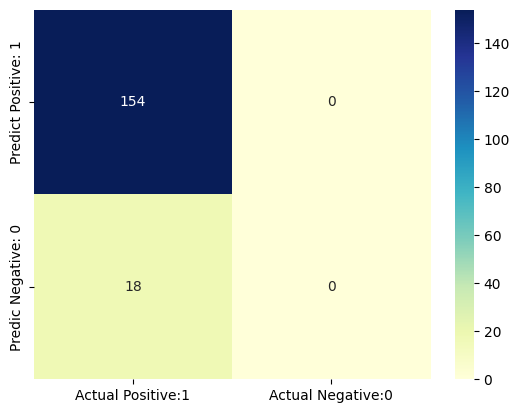

In [169]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data = cm, columns = ['Actual Positive:1','Actual Negative:0'],
                         index = ['Predict Positive: 1', 'Predic Negative: 0'])

sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap='YlGnBu')

##**Classification Report**

###**Classification Report**

**Classification report** is another way to evaluate the classification model performance. It displays the **precision, recall, f1** and **support** score  for the model. We have described thse terms in later.


We can print a classification report as follows:-

In [170]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.90      1.00      0.94       154
           1       0.00      0.00      0.00        18

    accuracy                           0.90       172
   macro avg       0.45      0.50      0.47       172
weighted avg       0.80      0.90      0.85       172



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###**Classification accuracy**


In [171]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [172]:
# print classification accuracy

classification_accuracy = (TP + TN)/float(TP + TN + FP + FN)

print('Classsification accuracy : {0:0.4f}'.format(classification_accuracy))

Classsification accuracy : 0.8953


###**Precision**

**Precision** can be defined as the percentage of correctly predicted outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of the true and false positives (TP + FP)

So, **Precision** identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class

Mathematically, precision can be defined as the ratio of `TP to (TP+FP)`.

In [173]:
# print precision score

precision = TP/float(TP +FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


###**Recall**

Recal can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outome. It can be given as the ratio of true positives (TP) to the sum of true positives and false negative (TP + FN). **Recall** is also called **Sensitivity**

**Recall** identifies the proportion of correctly predicted actual positives.

Mathematically, Recall can be given as  ratio of `TP to (TP+FN)`.



In [174]:
recall =TP/ float(TP+FN)

print('Recall or Sensitivity: {0:0.4f}'.format(recall))

Recall or Sensitivity: 0.8953


###**True Positive Rate**

**True Positive Rate** is synonymous with **Recall**.

In [175]:
true_positive_rate = TP/ float(TP + FN)

print('True Positive Rate: {0:0.4f}'.format(true_positive_rate))

True Positive Rate: 0.8953


###**f1-score**

**f1-score** is weighted harmonic mean of precision and recall. The best possible **f1-score** would be 1.0 and the worst would be 0.0. **f1-score** is the harmonic mean of precision and recall. So, **f1-score** is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of  `f1-score` should be used to compare classifier models, not global accuracy.

###**Support**

**Support** is the actual number of occurence of the class in our dataset.

##**17. Adjusting the treshold level**

In [179]:
#print the first 10 predicted probabilities of two classes - 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.91332527, 0.08667473],
       [0.82285053, 0.17714947],
       [0.86764707, 0.13235293],
       [0.74526936, 0.25473064],
       [0.93142289, 0.06857711],
       [0.92027532, 0.07972468],
       [0.90635415, 0.09364585],
       [0.89104937, 0.10895063],
       [0.8975672 , 0.1024328 ],
       [0.9098986 , 0.0901014 ]])

###**Observations**

* In each row, the numbers sum to 1.

* There are 2 columns which correspond to 2 classes- 0 and 1.

  * Class 0 - predicted probability that the patient have no cancer.

  * Class 1 - predicted probability that the patient have cancer.

* Importance of predicted probabilities
  
  * We can rank the observations by probability of rain or no rain.

* predict_proba process

  * Predicts the probabilities

  * Choose the class with the highest probability

* Classification threshold level

  * There is a classification threshold level of 0.5.

  * Class 1 - probability of rain is predicted if probability  > 0.5.

  * Class 0 - probability of no rain is predicted if probability  < 0.5.

In [180]:
#store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data = y_pred_prob, columns = ['Prob of - Patient w/o Cervix Cancer(0)', 'Prob of - Patient w/ Cervix Cancer(0)(1)'])

y_pred_prob_df

,Prob of - Patient w/o Cervix Cancer(0),Prob of - Patient w/ Cervix Cancer(0)(1)
0,0.913325,0.086675
1,0.822851,0.177149
2,0.867647,0.132353
3,0.745269,0.254731
4,0.931423,0.068577
5,0.920275,0.079725
6,0.906354,0.093646
7,0.891049,0.108951
8,0.897567,0.102433
9,0.909899,0.090101


In [181]:
# print the first 10 predicted probabilities for class 1 - Probability of patient with cancer

logreg.predict_proba(X_test)[0:10, 1]

array([0.08667473, 0.17714947, 0.13235293, 0.25473064, 0.06857711,
       0.07972468, 0.09364585, 0.10895063, 0.1024328 , 0.0901014 ])

In [182]:
# store the predited probabilities for class 1 - Probability of patient with cancer

y_pred1 = logreg.predict_proba(X_test)[:,1]

Text(0, 0.5, 'Frequency')

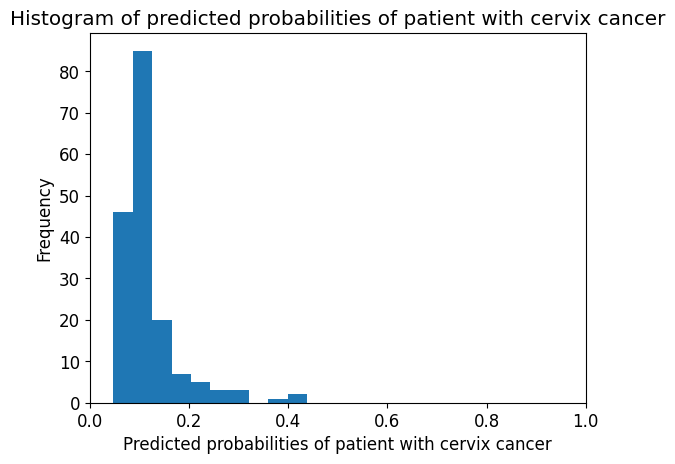

In [186]:
# plot histogram of predicted probabilities

#adjust the font size
plt.rcParams['font.size'] = 12

#plot histrogram with 5 bins
plt.hist(y_pred1, bins = 10)

#set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of patient with cervix cancer')

#set the x-axis limit
plt.xlim(0,1)

#set the title
plt.xlabel('Predicted probabilities of patient with cervix cancer')
plt.ylabel('Frequency')

###**Observations**

* We can see that the above histogram is highly positive skewed.

* The first column tell us that there are approximatelty 150 observations with probability between 0.0 and 0.1

* There are small number of observations with probability > 0.3.

* So, these small number of observations predict that there might be a patient with a cervix cancer .

* Majority of observation predict that the patient have no cervix cancer.

###**Lower the threshold**

In [188]:
from sklearn.preprocessing import binarize

for i in range(1,5):

  cm1=0

  y_pred1 = logreg.predict_proba(X_test)[:,1]
  y_pred1 = y_pred1.reshape(-1,1)
  y_pred2 = binarize(y_pred1, threshold = i/10)
  y_pred2 = np.where(y_pred2 == 1,1, 0)

  cm1 = confusion_matrix(y_test, y_pred2)

  print('With', i/10, 'threshold the Confusion Matrix is','\n\n',cm1,'\n\n',
          'with',cm1[0,0]+cm1[1,1],'correct predictions, ','\n\n',
        cm1[0,1],'Type I errors ( False Positives ), ','\n\n',
        cm1[1,0],'Type II errors ( False Negatives ), ','\n\n',
        'Accuracy Score: ', (accuracy_score(y_test, y_pred2)), '\n\n',
        'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
        'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])), '\n\n',
        '=========================================================','\n\n')

With 0.1 threshold the Confusion Matrix is 

 [[85 69]
 [ 8 10]] 

 with 95 correct predictions,  

 69 Type I errors ( False Positives ),  

 8 Type II errors ( False Negatives ),  

 Accuracy Score:  0.5523255813953488 

 Sensitivity:  0.5555555555555556 

 Specificity:  0.551948051948052 



With 0.2 threshold the Confusion Matrix is 

 [[145   9]
 [ 13   5]] 

 with 150 correct predictions,  

 9 Type I errors ( False Positives ),  

 13 Type II errors ( False Negatives ),  

 Accuracy Score:  0.872093023255814 

 Sensitivity:  0.2777777777777778 

 Specificity:  0.9415584415584416 



With 0.3 threshold the Confusion Matrix is 

 [[151   3]
 [ 17   1]] 

 with 152 correct predictions,  

 3 Type I errors ( False Positives ),  

 17 Type II errors ( False Negatives ),  

 Accuracy Score:  0.8837209302325582 

 Sensitivity:  0.05555555555555555 

 Specificity:  0.9805194805194806 



With 0.4 threshold the Confusion Matrix is 

 [[152   2]
 [ 18   0]] 

 with 152 correct predictions

###**Comments**
* In binary problems, the threshold of 0.5 is used by default to convert predicted  probabilities into class predictions.

* Threshold can be adjusted to increase sensitivity or specificity.

* Sensitivity and specificity have an inverse relationship. Increase one would always decrease the other and vice versa.

* We can see that increasing the threshold level results in increased accuracy.

* Adjusting the threshold level should be on of the last step you do in the model-building process.

##**18. ROC - AUC**

####**ROC Curve**

Another tool to measure the classification model performance visually is **ROC Curve**. ROC Curve stands for **Receiver Operating Characteristic Curve**. An  **ROC Curve** is a plot which shows the performance of a classification mdoel at various classification threshold levels.

The  **ROC Curve** plots the **True Positive Rate (TPR)** against the **False Positive Rate** at varius threshold levels.

**True Positive Rate (TPR)** is also called **Recall**. It is defined as the ratio of  `TP to (TP+FN).`

**False Positive Rate** is defined as ratio of `FP to (FP +TN).`

In the ROC Curve, we will focus on the TPR(True Positive Rate) and FPR(False Positive Rate) of a single point. This will give us the general performance of the ROC Curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification of threshold levels. If we lower the threshold levels, it may result in mroe items being classified as positive. It will increase both True Positive (TP) and False Positive(FP).


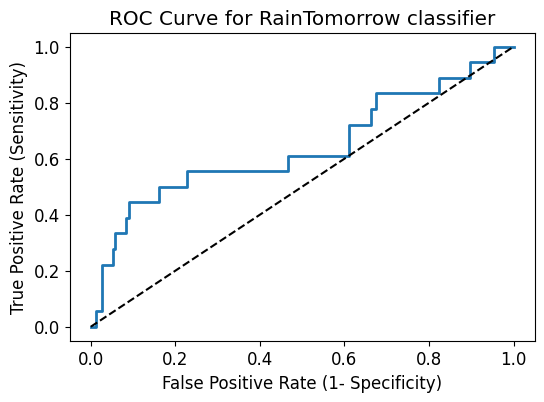

In [193]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr,tpr, thresholds = roc_curve(y_test,y_pred1, pos_label = 1)

plt.figure(figsize=(6,4))

plt.plot(fpr,tpr, linewidth =2)

plt.plot([0,1],[0,1],'k--'  )

plt.rcParams['font.size'] = 12

plt.title('ROC Curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1- Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

ROC curve help use to choose a threshold level that balances sensitivity and specificity for a particular context.

###**ROC - AUC**

**ROC-AUC** stands for **Receiver Operating Characteristic - Area Under Curve**. It is a technique to compare classifier performance. In this technique, we meausre the `area under the curve(AUC)`. A perfect classfier will have a ROC - AUC, whereas a purelt random classifier will have a ROC AUC equal to 0.5.

So, **ROC AUC** is the percentage of the ROC plto that is underneath the curve.

In [194]:
#compute ROC AUC

from sklearn.metrics import  roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC: {:.4f}'.format(ROC_AUC))

ROC AUC: 0.6407


####**Comments**

* ROC AUC is single number summary of classifier performance. The higher the value, the better the classifier.

* ROC AUC of our model approaches towards 1. an ROC AUC of 0.6407 indicates that there is room for improvement. The model’s ability to differentiate between positive and negative instances is moderate

In [195]:
# calculate cross-validated ROC AUC

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='roc_auc').mean()

print('Cross validated ROC AUC: {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC: 0.6717


##**k-Fold Cross Validation**

In [196]:
# Applying  5-fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))


Cross-validation scores:[0.86231884 0.88321168 0.88321168 0.87591241 0.87591241]


We can summarize the cross validation accuracy by calculating its mean.

In [197]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8761


An average score of 0.8761 suggests that the model performs well across the different folds.
It’s essential to consider other evaluation metrics and the specific context of your problem to fully understand the model’s effectiveness.


##**Hyperparameter Optimization using GridSearch CV**

In [201]:
from sklearn.model_selection import GridSearchCV

parameters = [{'penalty':['11','12']},
              {'C':[1, 10, 100, 1000]}]

grid_search = GridSearchCV(estimator = logreg,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose = 0)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['11', '12']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [202]:
#examin the best model

#best score achieved during the GridSearchCV
print('GridSeach CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

#print parameters that give the best results
print('Parameters that give the best results :','\n\n',(grid_search.best_params_))

#print estimator that was chosen by GridSearc
print('\n\nEstimate that was chosen by the search :','\n\n',(grid_search.best_estimator_))

GridSeach CV best score : 0.8805


Parameters that give the best results : 

 {'C': 100}


Estimate that was chosen by the search : 

 LogisticRegression(C=100, random_state=0, solver='liblinear')


In [203]:
#calculate GridSearch CV score on test set

print('GridSeach CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSeach CV score on test set: 0.8779


####**Comments**

* Our original model test accuracy is 0.8501 while GridSearch CV accuracy was 0.8502

*  This indicates that the initial model’s performance was better on unseen data compared to the model selected by the grid search.

##**Results and conclusion**

1. The logistic regression model accuracy score  is 0.8953.So, the model does a very good job in predicting the patient have a cervix cancer or not.

2. Small number of observations predict that some patient have a cervix cancer. Majority of observations predict that most of the patioent have no cervix cancer.

3. The model shows no sign of overfitting

4. Increasing the value of C results in higher test set accuracy and also a slightly decreased training set accuracy. So, we can conclude that model perform better well.

5. Increasing the treshold level results in increased accuracy

6. ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting cervix cancer in patient.

7. Our Original model accuracy score is 0.8953 whereas accuracy score after RFECV is 0.8500. So, we can obtain approximately similar accuract but with reduced set of features.


8. Our, original model score is found to be 0.8953. The average cross validation score is 0.8761. So we can conclude that cross-validation does not result in performance improvement.

9. Our original model test accuracy is 0.8953 while GridSearch CV accuracy is  0.8805. We can see that GridSearch Cv decreases the performance for this particular model.